In [3]:
!pip install wfdb

     |████████████████████████████████| 143kB 2.3MB/s 


In [22]:
import os
import shutil
import posixpath
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import pandas as pd 
import wfdb
import pywt

In [14]:
record = wfdb.rdrecord('s0010_re', pn_dir='ptbdb/patient001/')

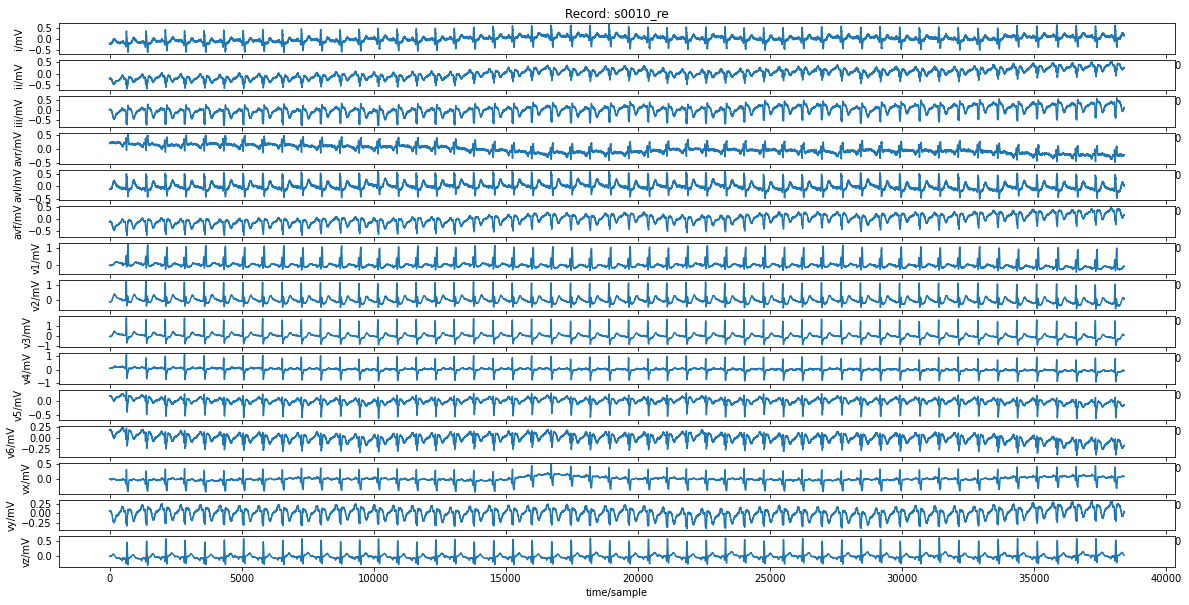

In [15]:
#Example of 12-lead ECG
wfdb.plot_wfdb(record=record, figsize = (20,10))

In [16]:
test = np.transpose(record.p_signal)[0]

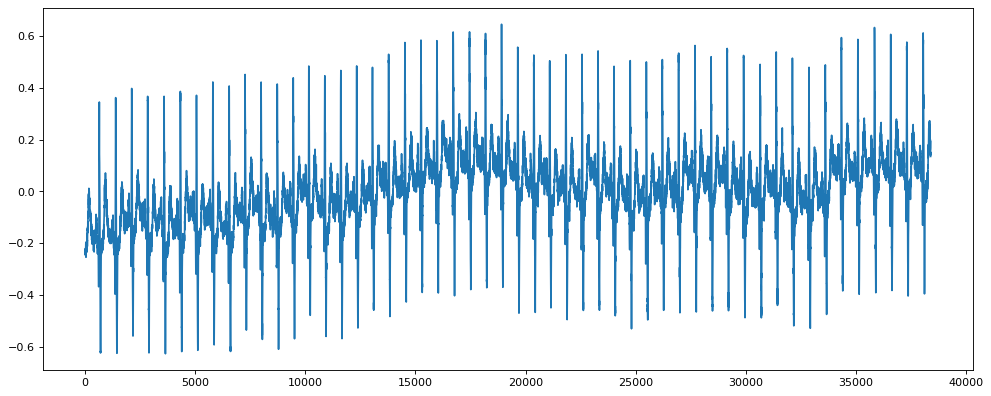

In [17]:
from matplotlib.pyplot import figure

#
figure(figsize=(15, 6), dpi=80)
plt.plot(np.arange(38400), test)

In [18]:
data = record.p_signal.flatten()

In [23]:
coeffs = pywt.wavedec(data=data, wavelet='db5', level=9)
cA9, cD9, cD8, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

# Threshold denoising
threshold = (np.median(np.abs(cD1)) / 0.6745) * (np.sqrt(2 * np.log(len(cD1))))
cD1.fill(0)
cD2.fill(0)
for i in range(1, len(coeffs) - 2):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)

# Wavelet inverse transform, obtain the denoised signal
rdata = pywt.waverec(coeffs=coeffs, wavelet='db5')

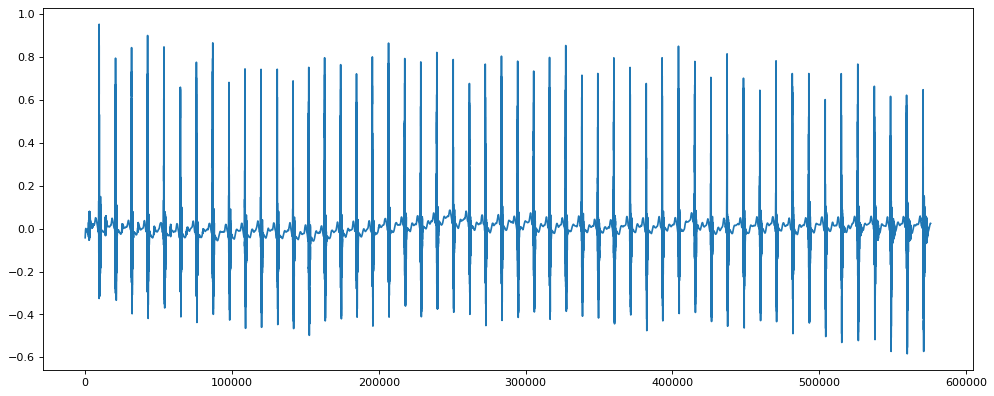

In [27]:
figure(figsize=(15, 6), dpi=80)
plt.plot(np.arange(576000), rdata)